In [1]:
import pandas as pd

In Anaconda Prompt, create a new environment (from the directory where the file is located 'cd {path}')
'conda env create -f tf_env.yml'

Damit tensorflow funktioniert muss eine Ältere Version von Python verwendet werde, python[version='3.10.*|3.9.*|3.8.*|3.7.*|3.6.*|3.5.*']
Kontrolle ob die richtige version verwendet wird mit  
'conda activate tf_env'  
'python --version'

Additionally the ipycerner package should be istalled. Will be proposed by VS Code when selecting or execuitng the new environment


In [2]:
# Load the DataFrame from the pickle file
df = pd.read_pickle('final_dataframe.pkl')


In [6]:
# Define feature columns and target variable
columns_x = ['size', 'distance_hospital', 'lr_day', 'lr_night', 'distance_ov', 'wbauj', 'modern',
             'erstvermietung', 'zentral', 'see', 'neu', 'stöckig', 'traum', 'bijou', 'neubau',
             'balkon', 'charmant', 'erstbezug', '1 Zimmer', '1.5 Zimmer', '2 Zimmer', '2.5 Zimmer',
             '3 Zimmer', '3.5 Zimmer', '4 Zimmer', '4.5 Zimmer', '5 Zimmer', '5.5 Zimmer',
             '6 Zimmer', '6.5 Zimmer', '7 Zimmer', '7.5 Zimmer', 'y0', 'y1999', 'y2000', 'y2001',
             'y2003', 'y2004', 'y2005', 'y2006', 'y2008', 'y2009', 'y2010', 'y2011', 'y2012',
             'y2013', 'y2014', 'y2015', 'y2016', 'y2017', 'y2018', 'y2019', 'y2020', 'y2021',
             'y2022', 'y2023', 'y2024']

X = df[columns_x]
y = df['price']

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.pipeline import Pipeline

# pip install --upgrade tensorflow scikit-learn
# scikit-learn is older version on install through conda
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

pipeline = Pipeline([
    ('regressor', KerasRegressor(build_fn=create_model, epochs=50, batch_size=32, verbose=2))
])

param_grid = {
    'regressor__epochs': [50, 100],
    'regressor__batch_size': [16, 32]
}

ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

In [5]:
import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import keras
from scikeras.wrappers import KerasRegressor
from sklearn.pipeline import Pipeline

# pip install --upgrade tensorflow scikit-learn
# scikit-learn is older version on install through conda
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

pipeline = Pipeline([
    ('regressor', KerasRegressor(build_fn=create_model, epochs=50, batch_size=32, verbose=2))
])

param_grid = {
    'regressor__epochs': [50, 100],
    'regressor__batch_size': [16, 32]
}

ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

In [7]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import scikeras
from scikeras.wrappers import KerasRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

pipeline = Pipeline([
    ('regressor', KerasRegressor(model=create_model, epochs=50, batch_size=32, verbose=2))
])

param_grid = {
    'regressor__model__epochs': [50, 100],
    'regressor__model__batch_size': [16, 32]
}

# Example usage of GridSearchCV
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3)

# Assuming you have your data in variables X and y
grid_result = grid.fit(X, y)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
for mean, std, param in zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score'], grid_result.cv_results_['params']):
    print(f"{mean:.3f} ({std:.3f}) with: {param}")


ValueError: 
All the 12 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gigim\anaconda3\envs\tf_env\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gigim\anaconda3\envs\tf_env\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\gigim\anaconda3\envs\tf_env\lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\gigim\anaconda3\envs\tf_env\lib\site-packages\scikeras\wrappers.py", line 760, in fit
    self._fit(
  File "c:\Users\gigim\anaconda3\envs\tf_env\lib\site-packages\scikeras\wrappers.py", line 915, in _fit
    X, y = self._initialize(X, y)
  File "c:\Users\gigim\anaconda3\envs\tf_env\lib\site-packages\scikeras\wrappers.py", line 852, in _initialize
    self.model_ = self._build_keras_model()
  File "c:\Users\gigim\anaconda3\envs\tf_env\lib\site-packages\scikeras\wrappers.py", line 429, in _build_keras_model
    model = final_build_fn(**build_params)
TypeError: create_model() got an unexpected keyword argument 'batch_size'


In [8]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

pipeline = Pipeline([
    ('regressor', KerasRegressor(model=create_model, epochs=50, batch_size=32, verbose=2))
])

param_grid = {
    'regressor__epochs': [50, 100],
    'regressor__batch_size': [16, 32]
}

# Example usage of GridSearchCV
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3)

# Fit the grid search to the data
grid_result = grid.fit(X, y)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
for mean, std, param in zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score'], grid_result.cv_results_['params']):
    print(f"{mean:.3f} ({std:.3f}) with: {param}")


Epoch 1/50
32/32 - 1s - loss: 9879237.0000 - 507ms/epoch - 16ms/step
Epoch 2/50
32/32 - 0s - loss: 5909179.0000 - 25ms/epoch - 767us/step
Epoch 3/50
32/32 - 0s - loss: 3458563.5000 - 25ms/epoch - 779us/step
Epoch 4/50
32/32 - 0s - loss: 3258694.2500 - 28ms/epoch - 885us/step
Epoch 5/50
32/32 - 0s - loss: 3132801.7500 - 29ms/epoch - 913us/step
Epoch 6/50
32/32 - 0s - loss: 3008754.2500 - 26ms/epoch - 805us/step
Epoch 7/50
32/32 - 0s - loss: 2860725.2500 - 26ms/epoch - 810us/step
Epoch 8/50
32/32 - 0s - loss: 2686540.7500 - 26ms/epoch - 808us/step
Epoch 9/50
32/32 - 0s - loss: 2475551.0000 - 25ms/epoch - 785us/step
Epoch 10/50
32/32 - 0s - loss: 2242791.5000 - 27ms/epoch - 846us/step
Epoch 11/50
32/32 - 0s - loss: 2008830.8750 - 26ms/epoch - 809us/step
Epoch 12/50
32/32 - 0s - loss: 1721281.7500 - 25ms/epoch - 791us/step
Epoch 13/50
32/32 - 0s - loss: 1558067.8750 - 25ms/epoch - 778us/step
Epoch 14/50
32/32 - 0s - loss: 1405540.6250 - 24ms/epoch - 748us/step
Epoch 15/50
32/32 - 0s - loss

In [10]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Model creation function
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Pipeline for KerasRegressor
pipeline = Pipeline([
    ('regressor', KerasRegressor(model=create_model, epochs=50, batch_size=32, verbose=2))
])

# Hyperparameters grid
param_grid = {
    'regressor__epochs': [50, 100],
    'regressor__batch_size': [16, 32]
}

# Example data split (replace X and y with your data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GridSearchCV
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Display the best parameters and score
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
for mean, std, param in zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score'], grid_result.cv_results_['params']):
    print(f"{mean:.3f} ({std:.3f}) with: {param}")

# Evaluate the model on the test data
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")


Epoch 1/50
26/26 - 0s - loss: 11001907.0000 - 430ms/epoch - 17ms/step
Epoch 2/50
26/26 - 0s - loss: 6332528.0000 - 19ms/epoch - 717us/step
Epoch 3/50
26/26 - 0s - loss: 3900422.7500 - 19ms/epoch - 729us/step
Epoch 4/50
26/26 - 0s - loss: 3648468.5000 - 21ms/epoch - 791us/step
Epoch 5/50
26/26 - 0s - loss: 3544189.7500 - 20ms/epoch - 755us/step
Epoch 6/50
26/26 - 0s - loss: 3419441.7500 - 19ms/epoch - 730us/step
Epoch 7/50
26/26 - 0s - loss: 3266715.7500 - 25ms/epoch - 959us/step
Epoch 8/50
26/26 - 0s - loss: 3069152.5000 - 23ms/epoch - 882us/step
Epoch 9/50
26/26 - 0s - loss: 2859158.7500 - 21ms/epoch - 806us/step
Epoch 10/50
26/26 - 0s - loss: 2661235.2500 - 19ms/epoch - 718us/step
Epoch 11/50
26/26 - 0s - loss: 2440342.5000 - 20ms/epoch - 766us/step
Epoch 12/50
26/26 - 0s - loss: 2245522.0000 - 20ms/epoch - 780us/step
Epoch 13/50
26/26 - 0s - loss: 2035873.0000 - 20ms/epoch - 767us/step
Epoch 14/50
26/26 - 0s - loss: 1857560.7500 - 18ms/epoch - 681us/step
Epoch 15/50
26/26 - 0s - los

In [11]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import plot_model

# Define your model creation function
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Plot the model architecture
model = create_model()
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Pipeline for KerasRegressor
pipeline = Pipeline([
    ('regressor', KerasRegressor(model=create_model, epochs=50, batch_size=32, verbose=2))
])

# Hyperparameters grid
param_grid = {
    'regressor__epochs': [50, 100],
    'regressor__batch_size': [16, 32]
}

# Example data split (replace X and y with your data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GridSearchCV
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Display the best parameters and score
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
for mean, std, param in zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score'], grid_result.cv_results_['params']):
    print(f"{mean:.3f} ({std:.3f}) with: {param}")

# Evaluate the model on the test data
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

# To plot the training history, you need to train the model directly and capture the history
history = create_model().fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=2)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/50
26/26 - 0s - loss: 13809983.0000 - 425ms/epoch - 16ms/step
Epoch 2/50
26/26 - 0s - loss: 10124615.0000 - 20ms/epoch - 767us/step
Epoch 3/50
26/26 - 0s - loss: 7073875.0000 - 20ms/epoch - 782us/step
Epoch 4/50
26/26 - 0s - loss: 4505709.5000 - 22ms/epoch - 844us/step
Epoch 5/50
26/26 - 0s - loss: 3602662.0000 - 21ms/epoch - 804us/step
Epoch 6/50
26/26 - 0s - loss: 3511924.0000 - 21ms/epoch - 806us/step
Epoch 7/50
26/26 - 0s - loss: 3404472.7500 - 19ms/epoch - 715us/step
Epoch 8/50
26/26 - 0s - loss: 3286860.5000 - 19ms/epoch - 741us/step
Epoch 9/50
26/26 - 0s - loss: 3149289.2500 - 20ms/epoch - 765us/step
Epoch 10/50
26/26 - 0s - loss: 2978728.2500 - 18ms/epoch - 690us/step
Epoch 11/50
26/26 - 0s - loss: 2814424.2500 - 19ms/epoch - 729us/step
Epoch 12/50
26/26 - 0s - loss: 2613197.7500 - 20ms/epoch - 767us/step
Epoch 13/50
26/26 

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [25]:
# Increase epoch amount as seen above that it plateas near end but might still impove
# training will take longer

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import plot_model

# Example data (replace with your actual data)
# X = ... (Your feature matrix)
# y = ... (Your target vector)

# Convert to DataFrame to handle missing values and ensure numeric types
X = pd.DataFrame(X)
y = pd.Series(y)

# Ensure all data is numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

# Handle missing values (example: fill with mean, you can choose a different strategy)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Convert back to NumPy arrays
X = X.to_numpy()
y = y.to_numpy()

# Define your model creation function
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Plot the model architecture
model = create_model()
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Pipeline for KerasRegressor
pipeline = Pipeline([
    ('regressor', KerasRegressor(model=create_model, epochs=50, batch_size=32, verbose=2))
])

# Hyperparameters grid
param_grid = {
    'regressor__epochs': [50, 100, 150, 200],
    'regressor__batch_size': [8, 16, 32, 64]
}

# Example data split (replace X and y with your data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GridSearchCV
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Display the best parameters and score
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
for mean, std, param in zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score'], grid_result.cv_results_['params']):
    print(f"{mean:.3f} ({std:.3f}) with: {param}")

# Evaluate the model on the test data
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")



You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/50
51/51 - 0s - loss: 10202325.0000 - 444ms/epoch - 9ms/step
Epoch 2/50
51/51 - 0s - loss: 4465243.5000 - 67ms/epoch - 1ms/step
Epoch 3/50
51/51 - 0s - loss: 3573760.0000 - 38ms/epoch - 755us/step
Epoch 4/50
51/51 - 0s - loss: 3330103.2500 - 37ms/epoch - 731us/step
Epoch 5/50
51/51 - 0s - loss: 2978488.2500 - 37ms/epoch - 727us/step
Epoch 6/50
51/51 - 0s - loss: 2607267.5000 - 35ms/epoch - 680us/step
Epoch 7/50
51/51 - 0s - loss: 2227402.7500 - 35ms/epoch - 695us/step
Epoch 8/50
51/51 - 0s - loss: 1927468.1250 - 37ms/epoch - 722us/step
Epoch 9/50
51/51 - 0s - loss: 1721573.5000 - 38ms/epoch - 745us/step
Epoch 10/50
51/51 - 0s - loss: 1487883.7500 - 38ms/epoch - 742us/step
Epoch 11/50
51/51 - 0s - loss: 1419449.3750 - 37ms/epoch - 725us/step
Epoch 12/50
51/51 - 0s - loss: 1372230.0000 - 38ms/epoch - 739us/step
Epoch 13/50
51/51 - 0s

Epoch 1/200
76/76 - 1s - loss: 7543103.0000 - val_loss: 3918299.0000 - 550ms/epoch - 7ms/step
Epoch 2/200
76/76 - 0s - loss: 3371325.5000 - val_loss: 3397740.0000 - 77ms/epoch - 1ms/step
Epoch 3/200
76/76 - 0s - loss: 3002978.2500 - val_loss: 2979978.2500 - 76ms/epoch - 1ms/step
Epoch 4/200
76/76 - 0s - loss: 2554537.2500 - val_loss: 2480224.5000 - 79ms/epoch - 1ms/step
Epoch 5/200
76/76 - 0s - loss: 2137496.2500 - val_loss: 2023533.0000 - 81ms/epoch - 1ms/step
Epoch 6/200
76/76 - 0s - loss: 1805694.1250 - val_loss: 1740375.6250 - 78ms/epoch - 1ms/step
Epoch 7/200
76/76 - 0s - loss: 1626441.7500 - val_loss: 1602134.7500 - 78ms/epoch - 1ms/step
Epoch 8/200
76/76 - 0s - loss: 1533778.1250 - val_loss: 1475076.1250 - 83ms/epoch - 1ms/step
Epoch 9/200
76/76 - 0s - loss: 1459682.0000 - val_loss: 1392044.3750 - 78ms/epoch - 1ms/step
Epoch 10/200
76/76 - 0s - loss: 1351980.3750 - val_loss: 1342003.5000 - 82ms/epoch - 1ms/step
Epoch 11/200
76/76 - 0s - loss: 1316041.8750 - val_loss: 1323212.750

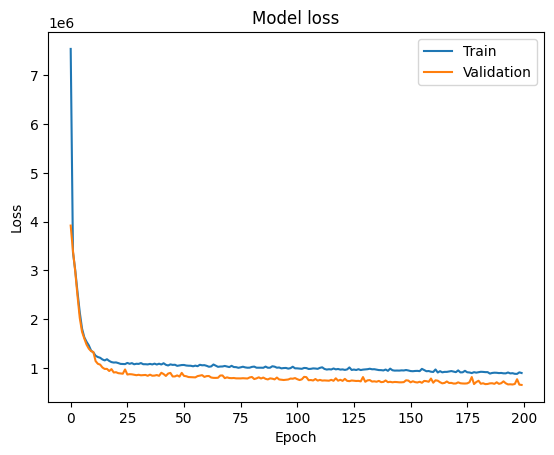

In [26]:
# To plot the training history, you need to train the model directly and capture the history, using best parameters defined above
history = create_model().fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=8, verbose=2)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Model with lover echos perform better gereralization

Epoch 1/200
10/10 - 1s - loss: 11141700.0000 - val_loss: 10115456.0000 - 503ms/epoch - 50ms/step
Epoch 2/200
10/10 - 0s - loss: 9603117.0000 - val_loss: 8784510.0000 - 27ms/epoch - 3ms/step
Epoch 3/200
10/10 - 0s - loss: 8294709.0000 - val_loss: 7624507.0000 - 30ms/epoch - 3ms/step
Epoch 4/200
10/10 - 0s - loss: 7053247.0000 - val_loss: 6368604.0000 - 29ms/epoch - 3ms/step
Epoch 5/200
10/10 - 0s - loss: 5777007.0000 - val_loss: 5179540.0000 - 31ms/epoch - 3ms/step
Epoch 6/200
10/10 - 0s - loss: 4646671.0000 - val_loss: 4256140.0000 - 31ms/epoch - 3ms/step
Epoch 7/200
10/10 - 0s - loss: 3853611.2500 - val_loss: 3793815.2500 - 30ms/epoch - 3ms/step
Epoch 8/200
10/10 - 0s - loss: 3557791.5000 - val_loss: 3733211.0000 - 30ms/epoch - 3ms/step
Epoch 9/200
10/10 - 0s - loss: 3500396.7500 - val_loss: 3708518.0000 - 30ms/epoch - 3ms/step
Epoch 10/200
10/10 - 0s - loss: 3449717.0000 - val_loss: 3635232.7500 - 29ms/epoch - 3ms/step
Epoch 11/200
10/10 - 0s - loss: 3393959.7500 - val_loss: 3585184.

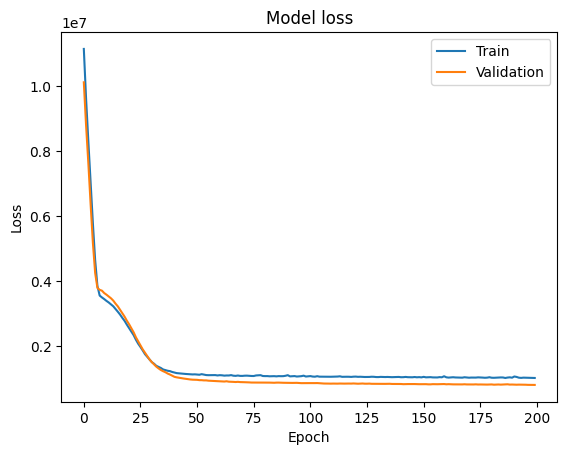

In [27]:
# To plot the training history, you need to train the model directly and capture the history, using best parameters defined above
history = create_model().fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=64, verbose=2)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Comparison with higher ebatch_size